In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy  as np
import pandas as pd

from sklearn import datasets
from scipy.spatial.distance import cdist #считает пространственную 

#Инициализируем датасет


In [56]:
iris = datasets.load_iris()
trainX = iris.data
trainY = iris.target

In [59]:
for i in range(len(trainY)):
    if trainY[i] == 2:
        trainY[i] = -1

In [60]:
trainY

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [61]:
testX = []
testY = []

#забираем 15 штук на валидацию, выбрал рандомно
indexes = [42, 25, 98, 50, 136, 113, 90, 118, 7, 81, 114, 128, 46, 103, 63]

for index in indexes:
  testX.append(trainX[index])
  testY.append(trainY[index])

trainX = np.delete(trainX, indexes, axis=0)
trainY = np.delete(trainY, indexes, axis=0)

In [62]:
testX = np.array(testX)
testY = np.array(testY)

#Визуализируем данные

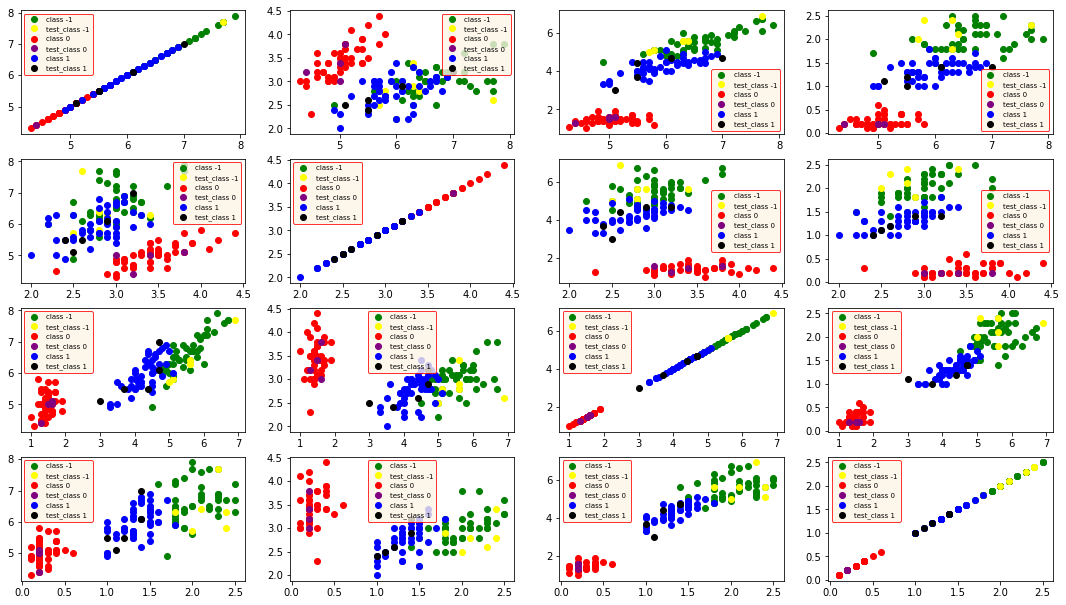

In [63]:
fig, axs = plt.subplots(nrows=4, ncols=4)

colors = ['red', 'blue', 'green']
test_colors = ['purple', 'black', 'yellow']

for i in range(4):
    for j in range(4):
        for k in np.unique(trainY):
            axs[i%4, j%4].plot(trainX[trainY==k, i], trainX[trainY==k, j], 'o', label='class {}'.format(k), color = colors[k])
            axs[i%4, j%4].plot(testX[testY==k, i], testX[testY==k, j], 'o', label='test_class {}'.format(k), color = test_colors[k])
            axs[i%4, j%4].legend(fontsize=7, ncol=1, facecolor='oldlace', edgecolor='r')

fig.set_size_inches(18.5, 10.5)
plt.show()

#Метод потенциальных функций


In [102]:
class PFM(object):
    
    def __init__(self, weights=None)->None:
        self.X, self.Y, self.gams = None, None, None
        self.weights = lambda x: np.ones_like(x)
        if weights is not None:
            self.weights = weights
    

    def _calc_dist(self, x, matrix) -> np.array:
        """
        Используем Евклидову метрику
        """
        distance = []

        for item in matrix:
            d = 0
            for i in range(len(x)):
                d += (x[i] - item[i])**2
            distance.append(d**(0.5))
        return np.array(distance)

    def _find_max(self, arr) -> float:
        max = arr[0]
        index = 0

        if max < np.abs(arr[1]):
            max = np.abs(arr[1])
            index = 1

        if max < np.abs(arr[2]):
            max = np.abs(arr[2])
            index = 2

        return arr[index]

    def predict(self, x)->None:

        distances = self._calc_dist(x, self.X)
        features = self.gams * distances
        class0, class1, class2 = 0, 0, 0

        # for f in features:
        #     if f == 0:
        #         class0 += f
        #     elif f == 1:
        #         class1 += f
        #     elif f == -1:
        #         class2 += f
        scores = np.vstack(
            [np.sum(features.T[np.where(self.Y==0)[0]].T, axis=-1),
            np.sum(features.T[np.where(self.Y==1)[0]].T, axis=-1),
            np.sum(features.T[np.where(self.Y==-1)[0]].T, axis=-1)]).T
        
        max = self._find_max(np.array(scores)[0])
        # print(np.sign(max))
        return int(np.sign(max))

    def fit(self, X: np.array, Y: np.array, epochs: int)->None:
        """
        Обучаем модель. У нас 3 класса - долно быть 3 заряда: {-1, 0, 1}
        сначала все заряды нулевые. Если предсказание не совпадает и gt класс == 1,
        увеличиваем заряд на 1;
        если gt класс == -1, уменьшаем на 1.
        """

        self.X, self.Y, self.gams = X, Y, np.zeros_like(Y)

        print(self.gams)
        
        for _ in range(epochs):
            for i in range(len(self.Y)):
                if self.predict(self.X[i]) != self.Y[i]:
                    if self.Y[i] == 1:
                        self.gams[i] += 1
                    elif self.Y[i] == -1:
                        self.gams[i] -= 1

    # def scores(self) ->None:
    #     pass
    

#Тренируем модель

In [107]:
model = PFM()
model.fit(trainX, trainY, 80)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [108]:
for i in range(len(testX)):
    print(f'predict: {model.predict(testX[i])} \t ground t: {testY[i]}')

predict: -1 	 ground t: 0
predict: -1 	 ground t: 0
predict: -1 	 ground t: 1
predict: 1 	 ground t: 1
predict: 1 	 ground t: -1
predict: -1 	 ground t: -1
predict: -1 	 ground t: 1
predict: 1 	 ground t: -1
predict: -1 	 ground t: 0
predict: -1 	 ground t: 1
predict: 1 	 ground t: -1
predict: 1 	 ground t: -1
predict: -1 	 ground t: 0
predict: 1 	 ground t: -1
predict: -1 	 ground t: 1


In [105]:
model.gams

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  20,   3,  19,  19,  19,  19,
        19,  18,  19,  18,  19,  18,  19,  18,  18,  18,  18,  18,  18,
        18,  18,  18,  18,  18,   1,   0,  18,  18,  18,  19,   8,  18,
        18,  14,  18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  19,
       -20, -19, -20, -20, -19,   0, -19, -19, -19, -19, -19, -19, -19,
       -19, -19,   0, -19,   0, -19, -17, -19, -19,   0,   0, -19, -19,
       -19, -19, -16, -18, -19, -18,   0, -19, -19, -18, -11, -20, -19,
       -18, -16, -18, -18, -12])